In [6]:

import numpy as np
import pandas as pd

from functions import get_manhattan, get_manhattan2

## Data

In [2]:
data = pd.read_csv('data/stats.csv')

In [10]:
data.sort_values(by='p_value_allele').head(20)

,Unnamed: 0,p_value_allele,p_value_genotype,allele_M,allele_M_CI,allele_W,allele_W_CI,general_W,general_W_CI,general_Ht,...,general_M,general_M_CI,dominant_W,dominant_W_CI,dominant_Ht_M,dominant_Ht_M_CI,recessive_W_Ht,recessive_W_Ht_CI,recessive_M,recessive_M_CI
593,rs5756932_NC_000022.11_38150111C>T,0.001255,0.003370,0.3140,"(0.1472, 0.6513)",3.1844,"(1.5353, 6.795)",4.4391,"(1.589, 13.2371)",0.4491,...,0.2025,"(0.0196, 1.1158)",4.4391,"(1.589, 13.2371)",0.2253,"(0.0755, 0.6293)",4.9383,"(0.8962, 51.0171)",0.2025,"(0.0196, 1.1158)"
395,rs4693075_NC_000004.12_83271015G>C,0.001593,0.005156,0.3308,"(0.1587, 0.6724)",3.0231,"(1.4872, 6.2997)",6.6377,"(1.3004, 66.1977)",1.3637,...,0.2813,"(0.0949, 0.7864)",6.6377,"(1.3004, 66.1977)",0.1507,"(0.0151, 0.769)",3.5555,"(1.2717, 10.5349)",0.2813,"(0.0949, 0.7864)"
126,rs12435908_NC_000014.9_65654750C>A,0.003811,0.008756,3.5317,"(1.4585, 9.2964)",0.2831,"(0.1076, 0.6856)",0.2274,"(0.072, 0.6592)",3.5196,...,4.0444,"(0.3771, 207.5304)",0.2274,"(0.072, 0.6592)",4.3980,"(1.517, 13.8959)",0.2473,"(0.0048, 2.6521)",4.0444,"(0.3771, 207.5304)"
335,rs1333047_NC_000009.12_22124505A>T,0.010225,0.021875,0.4167,"(0.2079, 0.8226)",2.3999,"(1.2156, 4.8103)",2.7780,"(0.794, 11.3006)",1.4908,...,0.2711,"(0.0809, 0.8243)",2.7780,"(0.794, 11.3006)",0.3600,"(0.0885, 1.2594)",3.6892,"(1.2131, 12.3605)",0.2711,"(0.0809, 0.8243)"
234,rs12670798_NC_000007.14_21567734T>C,0.016853,0.024247,0.3791,"(0.1622, 0.8506)",2.6375,"(1.1756, 6.1664)",2.4830,"(0.9226, 6.9174)",0.6708,...,0.1691,"(0.0034, 1.6156)",2.4830,"(0.9226, 6.9174)",0.4027,"(0.1446, 1.0839)",5.9132,"(0.619, 291.9729)",0.1691,"(0.0034, 1.6156)"
592,rs5756931_NC_000022.11_38150026T>C,0.016962,0.033045,0.4253,"(0.2048, 0.8666)",2.3513,"(1.154, 4.8829)",2.9062,"(1.0621, 8.3394)",0.6110,...,0.2385,"(0.0227, 1.3697)",2.9062,"(1.0621, 8.3394)",0.3441,"(0.1199, 0.9416)",4.1936,"(0.7301, 44.121)",0.2385,"(0.0227, 1.3697)"
333,rs10811656_NC_000009.12_22124473C>T,0.018602,0.019791,0.4434,"(0.2202, 0.8803)",2.2553,"(1.136, 4.5422)",2.3355,"(0.8129, 7.0961)",1.0987,...,0.1520,"(0.0151, 0.7922)",2.3355,"(0.8129, 7.0961)",0.4282,"(0.1409, 1.2302)",6.5771,"(1.2624, 66.251)",0.1520,"(0.0151, 0.7922)"
159,rs7593730_NC_000002.12_160314943T>C,0.024196,0.051563,2.9588,"(1.1392, 8.3927)",0.3380,"(0.1192, 0.8778)",0.2968,"(0.0054, 3.8846)",0.4893,...,2.8310,"(0.9534, 9.022)",0.2968,"(0.0054, 3.8846)",3.3687,"(0.2574, 183.6535)",0.3532,"(0.1108, 1.0488)",2.8310,"(0.9534, 9.022)"
65,rs7128307_NC_000011.10_2620773A>T,0.024220,0.044166,0.3880,"(0.1613, 0.8919)",2.5771,"(1.1212, 6.2007)",3.1337,"(1.1383, 9.0559)",0.3811,...,0.3042,"(0.0056, 3.9835)",3.1337,"(1.1383, 9.0559)",0.3191,"(0.1104, 0.8785)",3.2870,"(0.251, 179.2798)",0.3042,"(0.0056, 3.9835)"
332,rs10757277_NC_000009.12_22124451A>G,0.027891,0.030728,0.4720,"(0.2376, 0.9262)",2.1188,"(1.0796, 4.2083)",1.9918,"(0.6595, 6.3893)",1.4833,...,0.2204,"(0.047, 0.8178)",1.9918,"(0.6595, 6.3893)",0.5021,"(0.1565, 1.5164)",4.5373,"(1.2228, 21.2878)",0.2204,"(0.047, 0.8178)"


In [11]:
rs = data.iloc[:,0].str.split('_').str[0]
chr = np.floor(data.iloc[:,0].str.split('_').str[2].astype(float)).astype(int)
pos = data.iloc[:,0].str.split('_').str[-1].str[:-3].astype(int)


In [12]:
p_val = data.p_value_allele
get_manhattan(rs, chr, pos, p_val, title='GWAS plot showing association between SNPs on autosomes(allele) and HgA1c')

In [13]:
p_val = data.p_value_genotype
get_manhattan(rs, chr, pos, p_val, title='GWAS plot showing association between SNPs on autosomes(genotype) and HgA1c',)


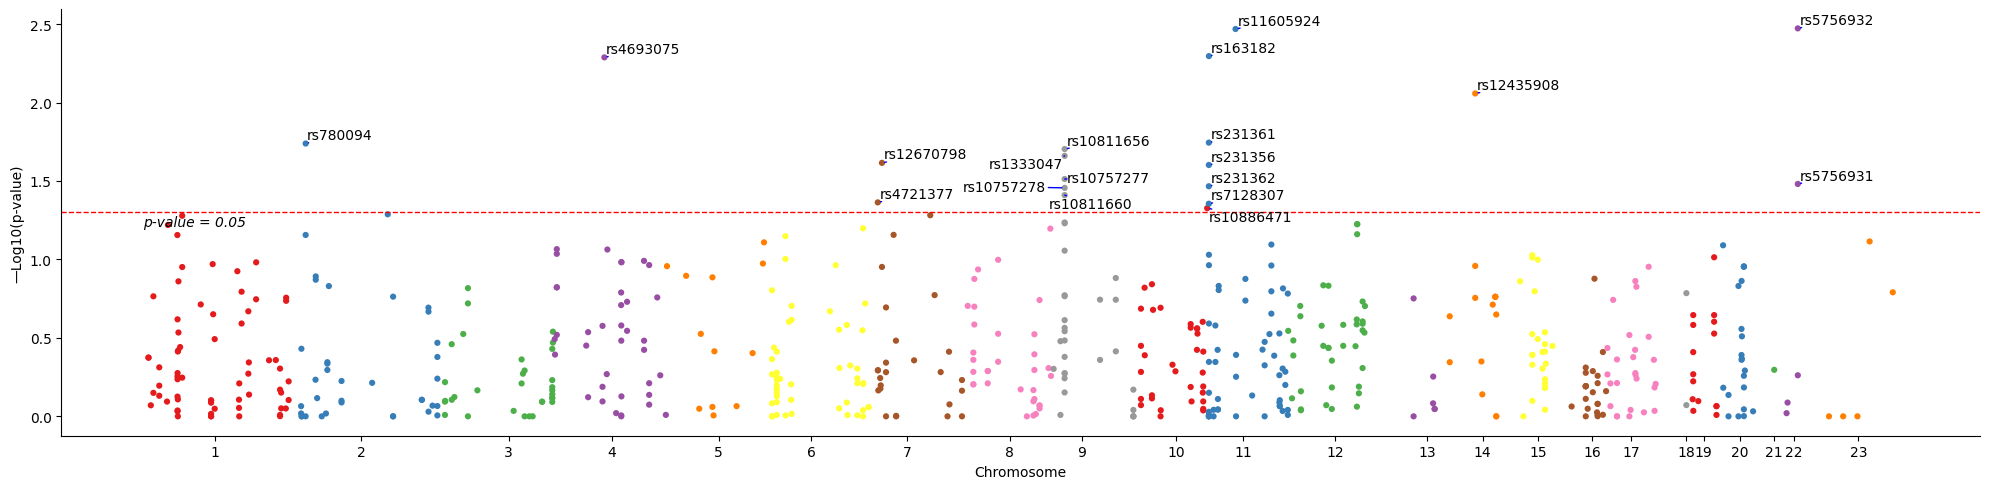

In [14]:
p_val = data.p_value_genotype
get_manhattan2(rs, chr, pos, p_val)